# Aim: Find the Outlier from the given data set using trimming and capping methods.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


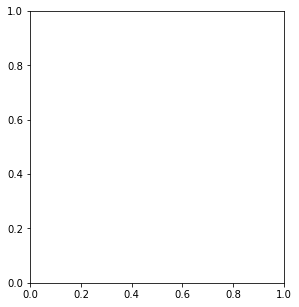

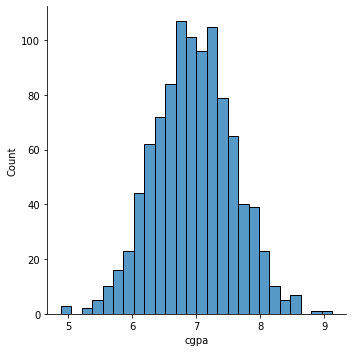

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.displot(df['cgpa'])


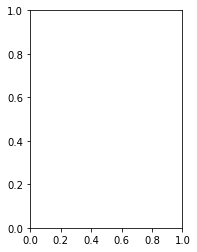

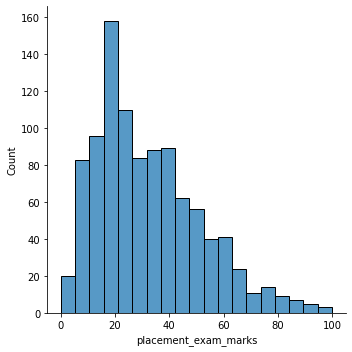

In [4]:
plt.subplot(1,2,2)
sns.displot(df['placement_exam_marks'])


In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\Users\User39\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

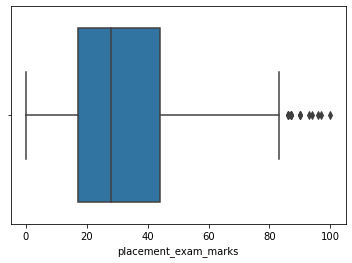

In [6]:
sns.boxplot(df['placement_exam_marks'])

In [7]:
# finding highest boundries values
print('Highest Boundary value of Cgpa',df['cgpa'].mean() + 3*df['cgpa'].std())

Highest Boundary value of Cgpa 8.808933625397177


In [8]:
# Finding lowest boundries value
print('Lowest Boundary value of Cgpa',df['cgpa'].mean() - 3*df['cgpa'].std())

Lowest Boundary value of Cgpa 5.113546374602842


In [9]:
# finding outliers
df[(df['cgpa']>8.80)| (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [10]:
df.shape

(1000, 3)

In [11]:
new_df = df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [12]:
new_df.shape

(995, 3)

# Z Score

In [13]:
df['cgpa_score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,cgpa_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [14]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961240,32.225000,0.489000,-1.600275e-14
std,0.615898,19.130822,0.500129,1.000000e+00
min,4.890000,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,9.120000,100.000000,1.000000,3.505062e+00


In [15]:
df['cgpa_score'].describe()

count    1.000000e+03
mean    -1.600275e-14
std      1.000000e+00
min     -3.362960e+00
25%     -6.677081e-01
50%     -2.013321e-03
75%      6.636815e-01
max      3.505062e+00
Name: cgpa_score, dtype: float64

In [16]:
df[df['cgpa_score']>3]

,cgpa,placement_exam_marks,placed,cgpa_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [17]:
df[df['cgpa_score']< -3]

,cgpa,placement_exam_marks,placed,cgpa_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [18]:
new_df = df[(df['cgpa_score']<3) & (df['cgpa_score']>-3)]
new_df.shape

(995, 4)

# Capping

In [19]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
lower_limit

5.113546374602842

In [20]:
df['cgpa_cap'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
    df['cgpa']<lower_limit,
        lower_limit,df['cgpa']
    
    
    )


)

In [21]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_score,cgpa_cap
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,6.961240,32.225000,0.489000,-1.600275e-14,6.961499
std,0.615898,19.130822,0.500129,1.000000e+00,0.612688
min,4.890000,0.000000,0.000000,-3.362960e+00,5.113546
25%,6.550000,17.000000,0.000000,-6.677081e-01,6.550000
50%,6.960000,28.000000,0.000000,-2.013321e-03,6.960000
75%,7.370000,44.000000,1.000000,6.636815e-01,7.370000
max,9.120000,100.000000,1.000000,3.505062e+00,8.808934


In [24]:
df['placement_exam_marks'].skew()

0.8356419499466834

C:\Users\User39\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

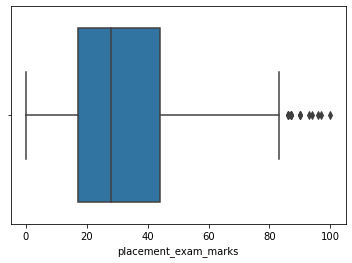

In [25]:
sns.boxplot(df['placement_exam_marks'])

In [26]:
q1,q2,q3=df['placement_exam_marks'].describe()[["25%","50%","75%"]]

In [27]:
q1

17.0

In [28]:
q2

28.0

In [29]:
q3

44.0

In [30]:
iqr = q3-q1

In [31]:
iqr

27.0

In [38]:
upper_limit =q3 +1.5*iqr
upper_limit

84.5

In [39]:
lower_limit =q1 -1.5*iqr
lower_limit

-23.5

In [40]:
df[df['placement_exam_marks'] > upper_limit].shape

(15, 5)

In [41]:
df[df['placement_exam_marks'] < lower_limit].shape


(0, 5)

In [43]:
new_dff = df[df['placement_exam_marks'] < upper_limit]

# Trimming

In [45]:
new_dff.shape

(985, 5)

<IPython.core.display.Javascript object>


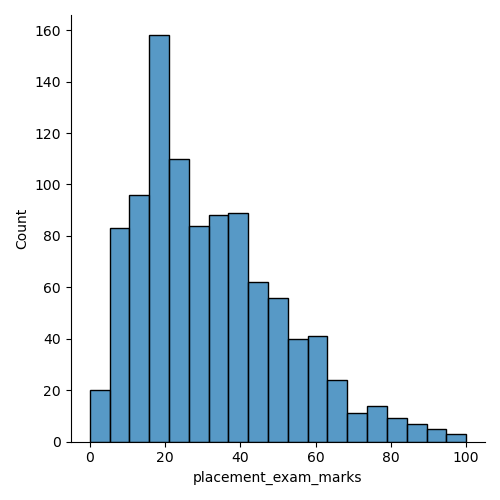

In [60]:


sns.displot(df['placement_exam_marks'])



<IPython.core.display.Javascript object>


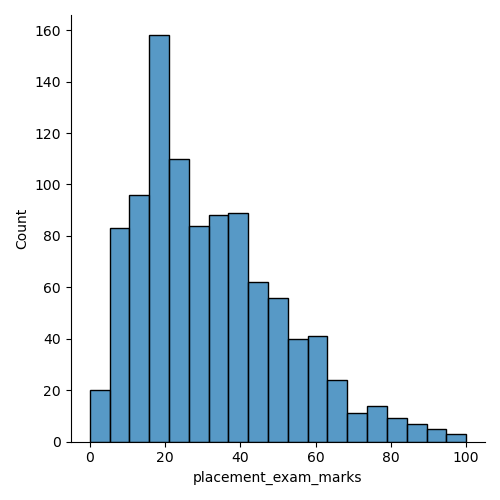

In [56]:

sns.displot(df['placement_exam_marks'])


<IPython.core.display.Javascript object>


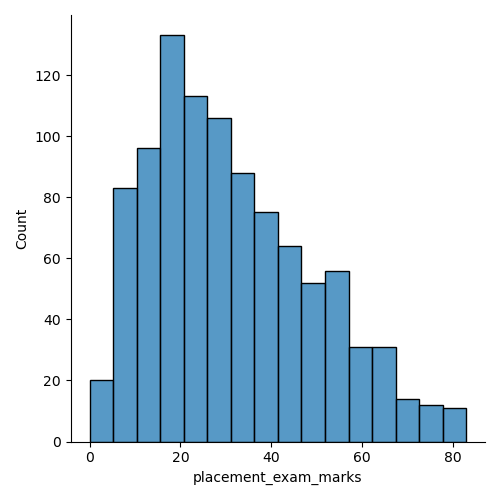

In [55]:

sns.displot(new_dff['placement_exam_marks'])


In [52]:
%matplotlib notebook

C:\Users\User39\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


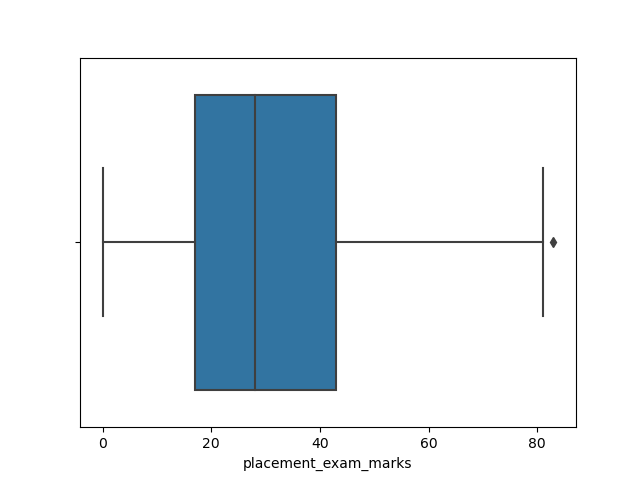

<AxesSubplot:xlabel='placement_exam_marks'>

In [54]:

sns.boxplot(new_dff['placement_exam_marks'])

# Capping

In [61]:
new_dff_cap = df.copy()

new_dff_cap['placement_exam_marks'] = np.where(
    new_dff_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_dff_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_dff_cap['placement_exam_marks']
    
    
    )
    



)

In [62]:
new_dff_cap

,cgpa,placement_exam_marks,placed,cgpa_score,cgpa_cap
0,7.19,26.0,1,0.371425,7.190000
1,7.46,38.0,1,0.809810,7.460000
2,7.54,40.0,1,0.939701,7.540000
3,6.42,8.0,1,-0.878782,6.420000
4,7.23,17.0,0,0.436371,7.230000
...,...,...,...,...,...
995,8.87,44.0,1,3.099150,8.808934
996,9.12,65.0,1,3.505062,8.808934
997,4.89,34.0,0,-3.362960,5.113546
998,8.62,46.0,1,2.693239,8.620000


In [64]:
new_dff_cap.shape

(1000, 5)

<IPython.core.display.Javascript object>


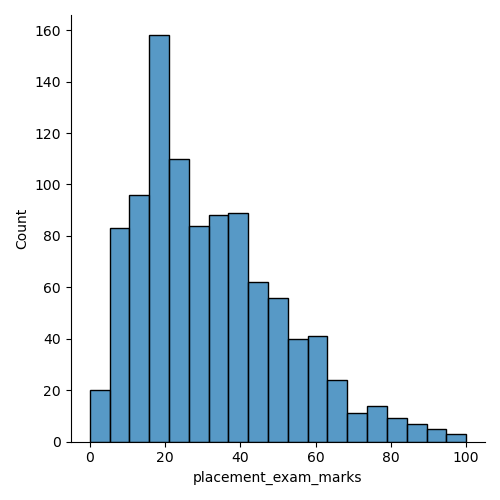

In [65]:
sns.displot(df['placement_exam_marks'])

<IPython.core.display.Javascript object>


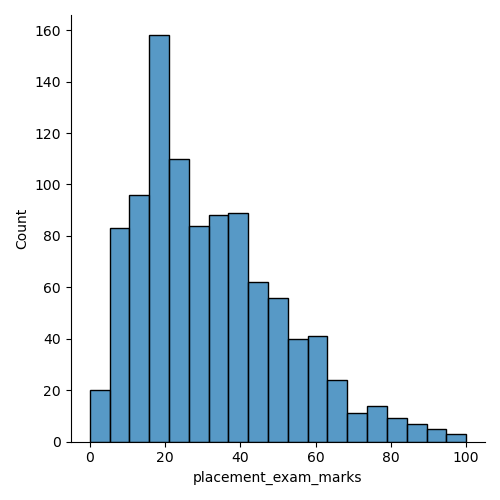

In [66]:
sns.displot(df['placement_exam_marks'])


<IPython.core.display.Javascript object>


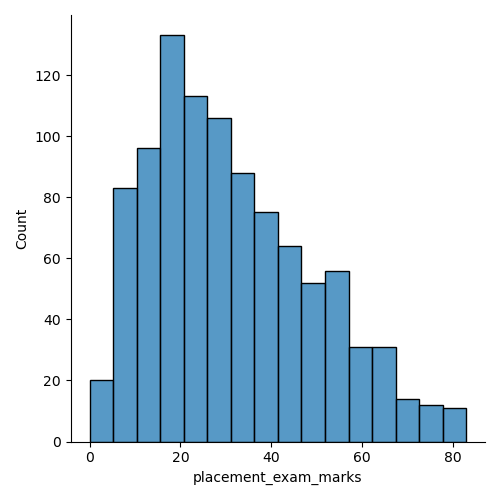

In [67]:
sns.displot(new_dff['placement_exam_marks'])

C:\Users\User39\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


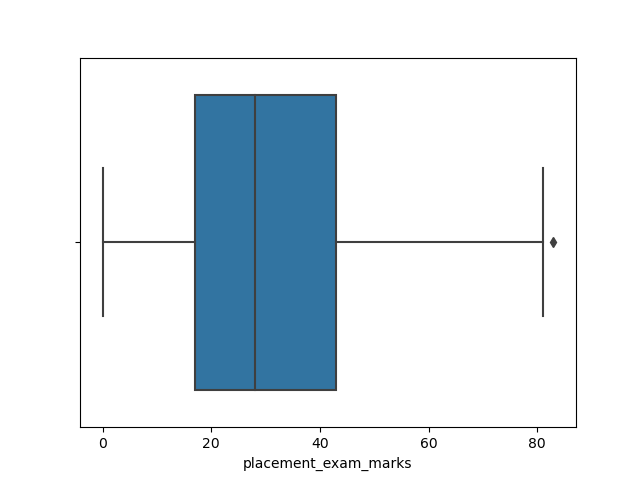

<AxesSubplot:xlabel='placement_exam_marks'>

In [68]:
sns.boxplot(new_dff['placement_exam_marks'])